# **Twitter Sentiment Analysis**  

---
**Authors:**

1. Elvis Wanjohi (Team Leader)

2. Jessica Gichimu

3. Jesse Ngugi

4. Stephen Gachingu

5. Latifa Riziki

---

## 1. Business Understanding   

### 1.1 Business Overview

Apple and Google are global technology companies which offer a variety of electronic products and software services. Like any big company, there is public opinion of the products and services they bring to the market. As leaders in the competitive tech industry, their operations depend heavily on customer satisfaction and public perception of their brands.

Customer sentiment plays a key role for both companies. Negative opinions expressed online can affect brand image and influence purchasing decisions. By analyzing customer feedback from social media platforms such as Twitter, these companies can gain insights into how users feel about their products and services. This can help identify areas for improvement, respond to customer concerns and strengthen their brand reputation.

---

### 1.2 Problem Statement

Apple and Google’s success rely heavily on maintaining strong customer satisfaction and positive public perception. With users actively sharing opinions on Twitter, analyzing this feedback has become important for improving products and strengthening brand reputation.

The main challenge is effectively analyzing this data to understand customer sentiment. To address this, this project builds a sentiment analysis model that classifies tweets about Apple and Google products into positive, negative or neutral categories. 

---

### 1.3 Business Objective

#### 1.3.1 Main Objective 

The main objective of this project is to develop a sentiment classification model that analyzes tweets about Apple and Google products and classifies them as positive, negative or neutral.

#### 1.3.2 Specific Objectives

The specific objectives of the project are:

1. Determine the products and services from Apple or Google that have the largest negative, positive and neutral feedback.

2. Preprocess the data through processes such as; Vectorization and tokenization, handling missing values and creating new features with respect to user behavior.

3. Evaluate the model performance using Precison, Recall and F1score.

4. Identify the most signficant features and important tokens.

5. Compare different classification models to determine which performs best for this dataset.

#### 1.3.3 Research Questions

1. Which products and services from Apple or Google have the largest negative, positive and neutral feedback?

2. Which features influence user behavior?

3. Which classifier model had the best Precison, Recall and F1 score?

4. What are the most significant features and tokens?

5. Which classification model performs best for this dataset?

---

### 1.5 Success Criteria  

The success of this project will be assessed in the following ways:

1. It should generate insights into how users feel about their products and services.

2. A machine learning model should be successfully developed that automatically determines the sentiment of a tweet based on words and tone used in the text.

 
---

## 2. Data Understanding

This section introduces the Twitter sentiment dataset used for the project. The dataset contains tweets about Apple and Google products, forming the basis for building a sentiment classification model.

The aim is to understand the structure and content of the dataset. This involves reviewing the available features, checking their data types and identifying potential issues such as missing values or inconsistencies.

By exploring the data at this stage, it is possible to detect quality concerns early and begin considering how the dataset can best be prepared for text cleaning, preprocessing and model development.

### 2.1 Importing Required Libraries

The necessary Python libraries for data handling, visualization and modeling are imported. These include Pandas, NumPy, Seaborn, Matplotlib, Plotly, Scikit-learn, Imbalanced-learn, NLTK and Regex for text preprocessing and analysis.

In [28]:
# Import required libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Text preprocessing and NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.colors as pc
from IPython.display import Image, display

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack, csr_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Classification algorithms
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Model interpretation and saving
import lime
import lime.lime_text
import joblib
import pickle

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

#### 2.1.2. Data Loading and Inspection

In this section, the Twitter sentiment dataset is loaded from a CSV file into a Pandas DataFrame. Basic inspection functions are applied to confirm successful loading and to preview the structure of the dataset before proceeding with further analysis.

In [29]:
# Load the dataset
data = pd.read_csv("c:\judge-1377884607_tweet_product_company.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Each row in the dataset represents a tweet posted by a user. The columns include:

- tweet_text: The text content of the tweet used for sentiment classification.

- emotion_in_tweet_is_directed_at: The target of the emotion expressed in the tweet (e.g., Apple or Google).

- is_there_an_emotion_directed_at_a_brand_or_product: Indicates whether the tweet expresses an emotion directed at a brand or product. This serves as the target label for classification.

This information provides the foundation for analyzing user sentiments toward different brands and for developing sentiment classification models.

In [30]:
# Check the shape of the dataset
data.shape

(9093, 3)

- The dataset has 9093 rows and 3 columns.

In [31]:
# Display data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- All the columns in the dataset are non null.

- All the columns are of the object data type.

In order to understand the columns better, and for ease of readability, the columns are renamed to give the data more meaning.

In [32]:
# Rename the columns in the dataset
def rename_columns(df):
    df.columns = ['tweet', 'tweet_directed_at', 'sentiment']
    return df

data = rename_columns(data)
data.head()

,tweet,tweet_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In the sentiment column, it is possible to check the different classes (sentiments) and their respective counts.

In [33]:
# Check the unique values in 'sentiment'
data['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

- The dataset contains four sentiment categories: Positive emotion, Negative emotion, No emotion toward the brand or product and I can’t tell.

- The last two are merged into a single Neutral emotion category, resulting in three final classes: Positive, Negative and Neutral.

In [34]:
# Combine the 'No emotion toward brand or product' and 'I can't tell' into a single category
data['sentiment'] = data['sentiment'].replace(
    {
        "No emotion toward brand or product": "Neutral emotion",
        "I can't tell": "Neutral emotion",
    }
)

# Check the unique values in the sentiment column
print("Unique Sentiments:")
print(data['sentiment'].unique())

Unique Sentiments:
['Negative emotion' 'Positive emotion' 'Neutral emotion']


Next, missing values and duplicate values are checked in the dataset.

In [35]:
# Check for missing values and express as a percentage
missing_values = data.isna().sum() / len(data) * 100
print("Missing Values (%):")
print(missing_values)

Missing Values (%):
tweet                 0.010997
tweet_directed_at    63.807324
sentiment             0.000000
dtype: float64


- The tweet_directed_at column has numerous missing values. They are replaced with the string 'Not directed' to show that those tweets are not directed at any specific entity.

In [36]:
# Fill the missing values in 'tweet_directed_at' column with 'Not directed'
data['tweet_directed_at'].fillna('Not directed', inplace=True)

# Drop the missing value in 'tweet' column
data.dropna(subset=['tweet'], inplace=True, axis=0)

# Check again for missing values
data.isna().sum()

tweet                0
tweet_directed_at    0
sentiment            0
dtype: int64

Next, duplicate rows in the dataset are checked.

In [37]:
# Check for duplicate values
data.duplicated().sum()

np.int64(22)

- There are 22 duplicate rows in the dataset. The duplicate rows are dropped entirely.

In [38]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

Next, the summary statistics of the data are checked.

In [39]:
data.describe()

,tweet,tweet_directed_at,sentiment
count,9070,9070,9070
unique,9065,10,3
top,Win free ipad 2 from webdoc.com #sxsw RT,Not directed,Neutral emotion
freq,2,5788,5531


### 2.3. Exploratory Data Analysis

This section investigates the dataset to get insights, evaluate feature distributions, assess relationships and detect issues or outliers. The findings guide the selection of appropriate modeling techniques.

#### 2.3.1. Dataset Overview

This section covers the general overview of the dataset. This includes the shape, number of tweets, number of features and column info.

In [40]:
# Dataset overview
print("Dataset Overview")
print(f"Dataset shape: {data.shape}")
print(f"Number of tweets: {len(data)}")
print(f"Number of features: {len(data.columns)}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn Information:")
for col in data.columns:
    print(f"• {col}: {data[col].dtype}")

Dataset Overview
Dataset shape: (9070, 3)
Number of tweets: 9070
Number of features: 3
Memory usage: 2.54 MB

Column Information:
• tweet: object
• tweet_directed_at: object
• sentiment: object


#### 2.3.2. Sentiment Distribution Analysis

In this section, the distribution of the unique values in the sentiment column is inspected.

In [41]:
# Sentiment Distribution Analysis
print("Sentiment Distribution Analysis")

# Count unique sentiment values
sentiment_counts = data['sentiment'].value_counts()
print("\nSentiment Categories:")
print(sentiment_counts)

# Calculate percentages
sentiment_percentages = data['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution (%):")
print(sentiment_percentages.round(2))

Sentiment Distribution Analysis

Sentiment Categories:
sentiment
Neutral emotion     5531
Positive emotion    2970
Negative emotion     569
Name: count, dtype: int64

Sentiment Distribution (%):
sentiment
Neutral emotion     60.98
Positive emotion    32.75
Negative emotion     6.27
Name: proportion, dtype: float64


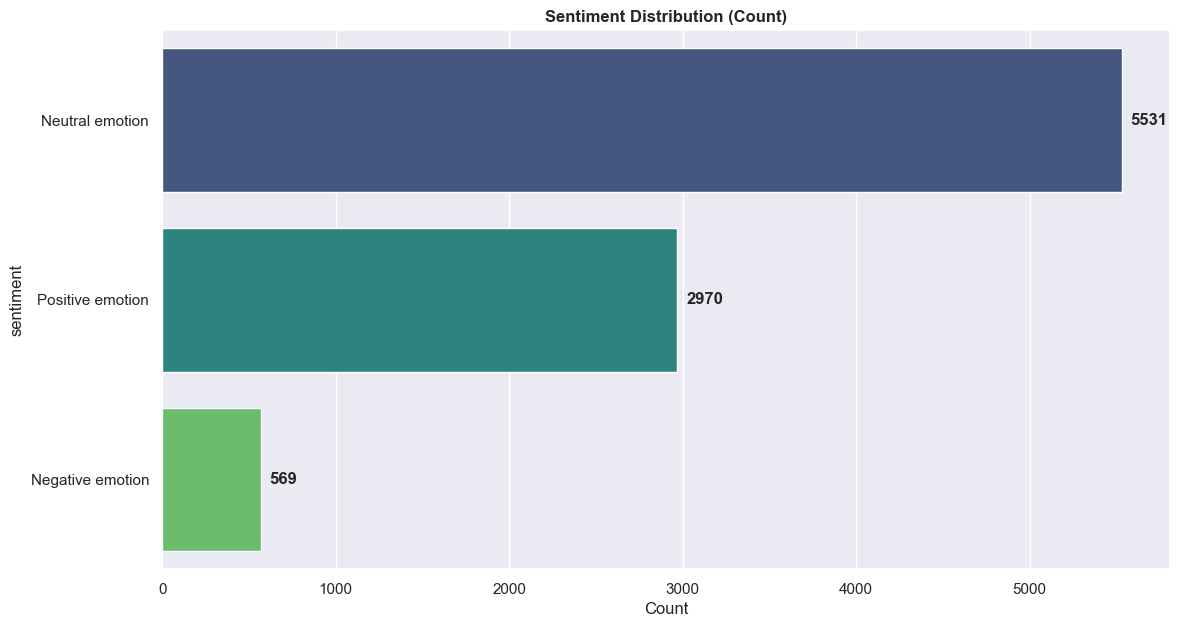

In [42]:
# Visualize sentiment distribution
plt.figure(figsize=(13, 7))

# Plot 1: Count Plot

# plt.subplot(2, 3, 1)
ax = sns.countplot(data=data, y='sentiment', order=sentiment_counts.index, palette='viridis')
plt.title('Sentiment Distribution (Count)', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(sentiment_counts.values):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

From the plot, the following were the key observations:

- Out of the 9070 tweets in the dataset, 5531 tweets express a neutral emotion. This is about 60.98% of the total tweets, 2970 tweets express a positive emotion, which is about 32.75% of the total tweets and 569 tweets express a negative emotion, which is about 6.27% of the total tweets.

- This indicates that the sentiment (target) column is highly imbalanced. This imbalance can negatively impact the performance of the prediction model by influencing the model to make false predictions. Therefore, the class imbalance will be handles before modeling.

#### 2.3.3. Tweet Destination distribution

This section examines how tweets are distributed across different brands and products. The analysis helps identify which entities receive the most social media attention, reveals sentiment patterns by brand, assesses data balance, provides competitive insights between Apple and Google, and highlights brands or products that may require deeper sentiment analysis.

These insights will guide the modeling approach and support actionable business insights for brand management and product development strategies.

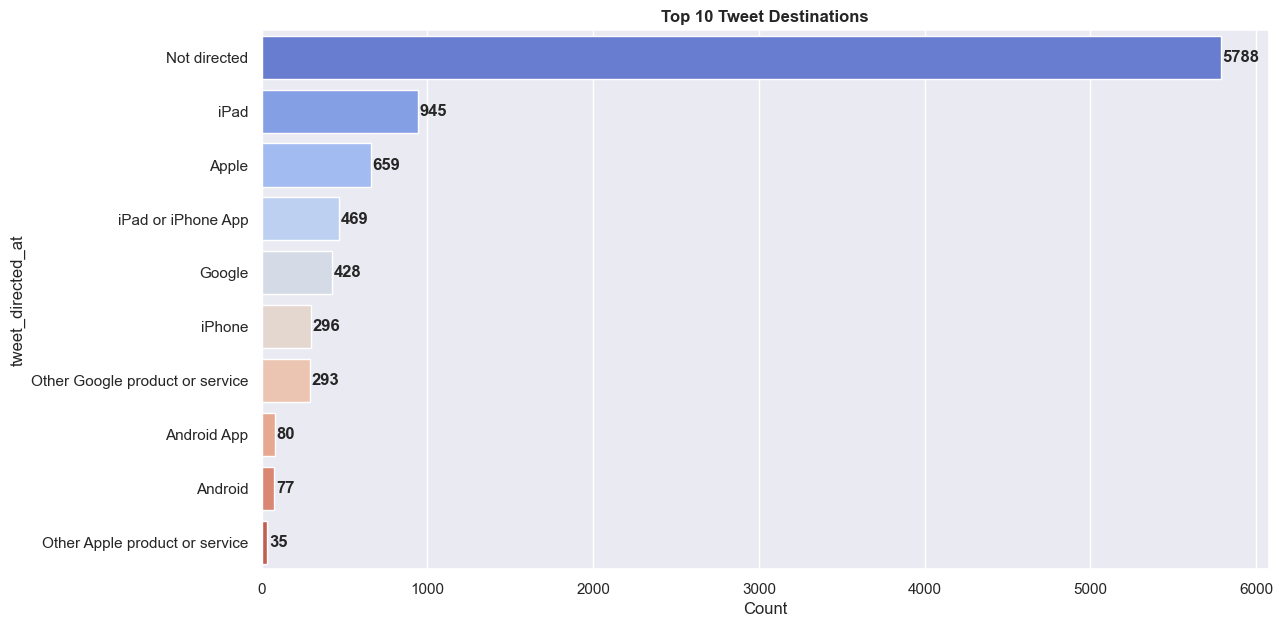

In [43]:
# Plot 2: Tweet Destination Distribution

plt.figure(figsize=(13, 7))
tweet_dest_counts = data['tweet_directed_at'].value_counts().head(10)
ax = sns.barplot(x=tweet_dest_counts.values, y=tweet_dest_counts.index, palette='coolwarm')
plt.title('Top 10 Tweet Destinations', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(tweet_dest_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')

The following were the key observations:

- The plot shows that most tweets are not directed at any specific brand, with 'Not directed' being the largest category.

- Among the directed tweets, 'iPad', 'Apple', and 'iPad or iPhone App' are the most mentioned, followed by 'Google' and 'iPhone'.

- This shows that Apple products dominate discussions, while Google products receive fewer mentions, highlighting a strong focus on Apple within the top tweet destinations.

#### 2.3.4. Sentiment by Tweet Destination

This section examines how sentiment is distributed across major brands and products such as Apple, Google, iPhone and iPad. It shows the share of positive, negative and neutral tweets for each destination to reveal how each brand is perceived by users.

The analysis helps to:

- Compare sentiment levels across brands and products.

- Identify which entities receive more positive or negative feedback.

- Provide insights that can support marketing and communication decisions.

This step shows a clear view of brand sentiment. It shows areas where each brand performs well and where improvement may be needed.

In [44]:
# Plot 4: Sentiment by Tweet Destination using Plotly

# Prepare data
top_destinations = data['tweet_directed_at'].value_counts().head(5).index
filtered_df = data[data['tweet_directed_at'].isin(top_destinations)]
sentiment_destination = pd.crosstab(filtered_df['tweet_directed_at'], filtered_df['sentiment'])

# Create stacked bar chart
fig = go.Figure()

for sentiment in sentiment_destination.columns:
    fig.add_trace(go.Bar(
        x=sentiment_destination.index,
        y=sentiment_destination[sentiment],
        name=sentiment,
        text=sentiment_destination[sentiment],
        textposition='auto'
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment by Top 5 Destinations',
    xaxis_title='Tweet Destination',
    yaxis_title='Count',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    # width=1200,
    height=800
)

fig.show()

The following were the key observations:

- Not directed category has the highest count with 5,431 neutral tweets. This shows that many tweets are general rather than brand specific.

- Among directed destinations, iPad with 792 and Apple with 541 record the most mentions, followed by iPad or iPhone App (396) and Google (344).

- Positive sentiment is dominant across directed destinations, while negative sentiment is minimal.

- This shows that Apple products attract the most engagement and has more favourable sentiment.

In [45]:
# Plot 5: Sentiment Proportions by Destination

# Create percentage data from the crosstab
sentiment_dest_pct = sentiment_destination.div(sentiment_destination.sum(axis=1), axis=0) * 100

# Define custom colors for each sentiment
sentiment_colors = {
    'Positive emotion': '#2ecc71',   # green
    'Negative emotion': '#e74c3c',   # red
    'Neutral emotion':  '#f1c40f'    # yellow
}

fig = go.Figure()

for sentiment in sentiment_dest_pct.columns:
    fig.add_trace(go.Bar(
        x=sentiment_dest_pct.index,
        y=sentiment_dest_pct[sentiment],
        name=sentiment,
        text=sentiment_dest_pct[sentiment].round(1).astype(str) + '%',
        textposition='auto',
        marker_color=sentiment_colors.get(sentiment, None)
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment Proportions by Destination',
    xaxis_title='Tweet Destination',
    yaxis_title='Percentage',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    # width=1200,
    height=800
)

fig.show()

This plot shows the percentage distribution of positive, neutral and negative sentiments across the top five tweet destinations:

- Apple, iPad, and iPad or iPhone App show strong positive sentiment, exceeding 80%.

- Google also records high positivity at about 80% but slightly higher negative and neutral shares than Apple destinations.

- Not directed tweets are mostly neutral at 93.8%, showing minimal sentiment variation.

- This shows that tweets targeting Apple and Google products highlight favourable public perception, while non-targeted tweets remain mostly neutral.

#### 2.3.5 Tweet Length Distribution by Sentiment

This section shows the distribution of tweet lengths (measured in number of characters) across the three sentiment categories: Positive, Negative and Neutral.

The boxplot below illustrates the median, quartiles and outliers within each sentiment class to identify potential differences in how users express their opinions. Analyzing tweet length by sentiment helps determine whether certain emotions are conveyed through shorter or longer tweets.

([0, 1, 2],
 [Text(0, 0, 'Negative emotion'),
  Text(1, 0, 'Positive emotion'),
  Text(2, 0, 'Neutral emotion')])

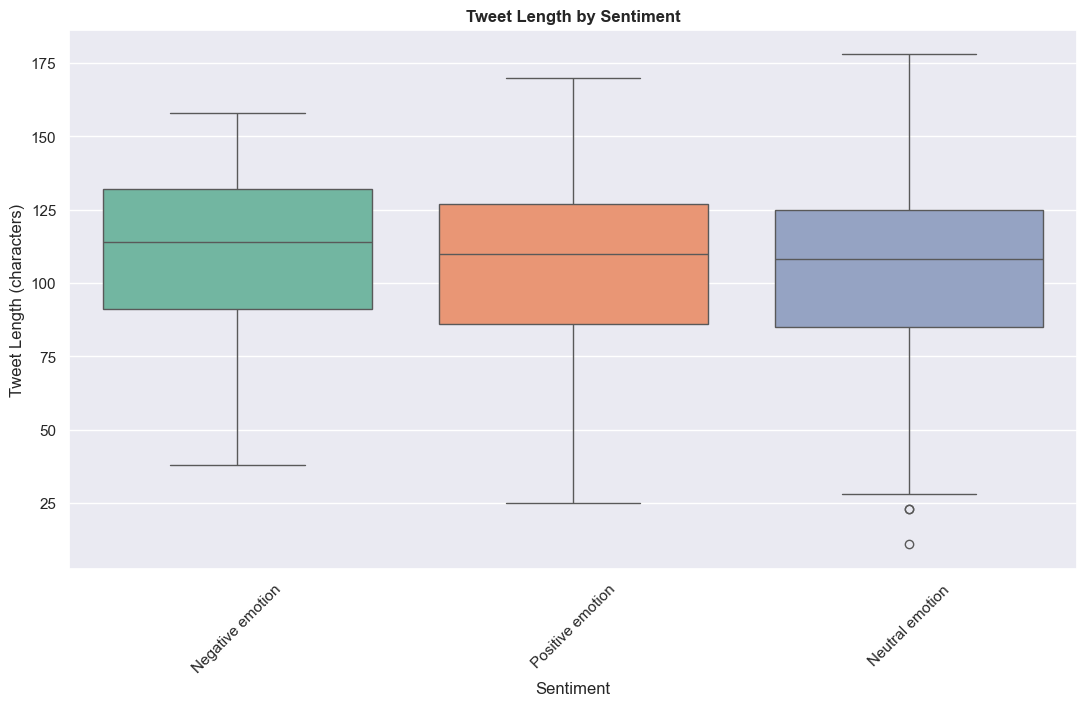

In [46]:
# Plot 6: Tweet Length Distribution by Sentiment

plt.figure(figsize=(13, 7))
data['tweet_length'] = data['tweet'].str.len()
sns.boxplot(data=data, x='sentiment', y='tweet_length', palette='Set2')
plt.title('Tweet Length by Sentiment', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=45)

The boxplot above shows the distribution of tweet lengths (in number of characters) across the three sentiment categories: Positive, Negative and Neutral.

- Neutral tweets has a wider range of lengths. The median length remains consistent across all sentiment groups.

- Outliers with longer tweet lengths are present within each sentiment category.

- The tweet length shows little variation across sentiments. This shows that sentiment type is not strongly associated with tweet length in this dataset.

#### 2.3.6 Distribution of Character, Word and Sentence Counts

This section examines the basic linguistic structure of tweets by analyzing the distribution of character, word and sentence counts. This helps in understanding the length, complexity and composition of tweets across different sentiment categories.

New features such as chars, words and sentences are created to quantify these properties for each tweet. Analyzing the distributions helps to:

- Identify patterns in tweet length and complexity across sentiments.

- Detect differences between sentiment classes, such as whether negative tweets are shorter or more direct.

- Show potential data quality issues. This could include outliers or anomalies in text length.

- Reveal feature engineering opportunities that can improve sentiment classification performance.

These analyses provide a detailed view of the dataset’s linguistic characteristics. This supports more effective preprocessing and model development.

In [47]:
# Feature engineering
def generate_columns(df):
    df['chars'] = df['tweet'].apply(len)
    df['words'] = df['tweet'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
    df['sentences'] = df['tweet'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)
    return df
data = generate_columns(data)
data.head()

,tweet,tweet_directed_at,sentiment,tweet_length,chars,words,sentences
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,127,32,5
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,139,29,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,79,20,2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,82,21,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,131,29,1


Text(0, 0.5, 'Frequency')

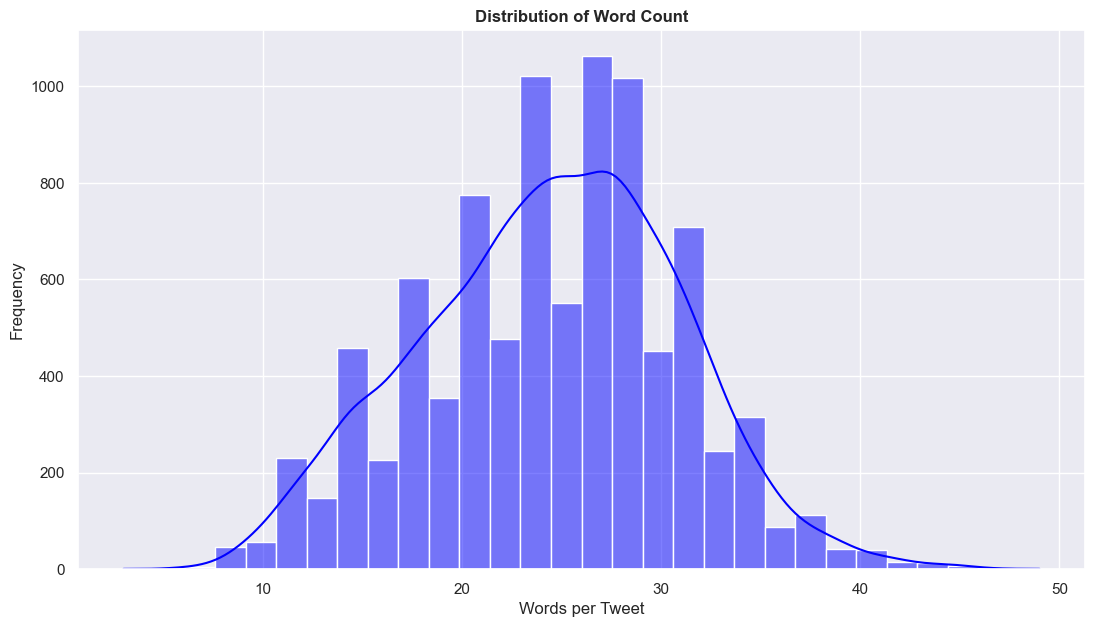

In [48]:
# Plot 7: Word Count Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data=data, x='words', bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count', fontweight='bold')
plt.xlabel('Words per Tweet')
plt.ylabel('Frequency')

From the histogram above, the following were observed:

- The data is approximately normally distributed with most tweets containing 20–30 words.

- The distribution is slightly right-skewed. This shows that longer tweets of above 35 words are less frequent than shorter ones.

([0, 1, 2],
 [Text(0, 0, 'Negative emotion'),
  Text(1, 0, 'Positive emotion'),
  Text(2, 0, 'Neutral emotion')])

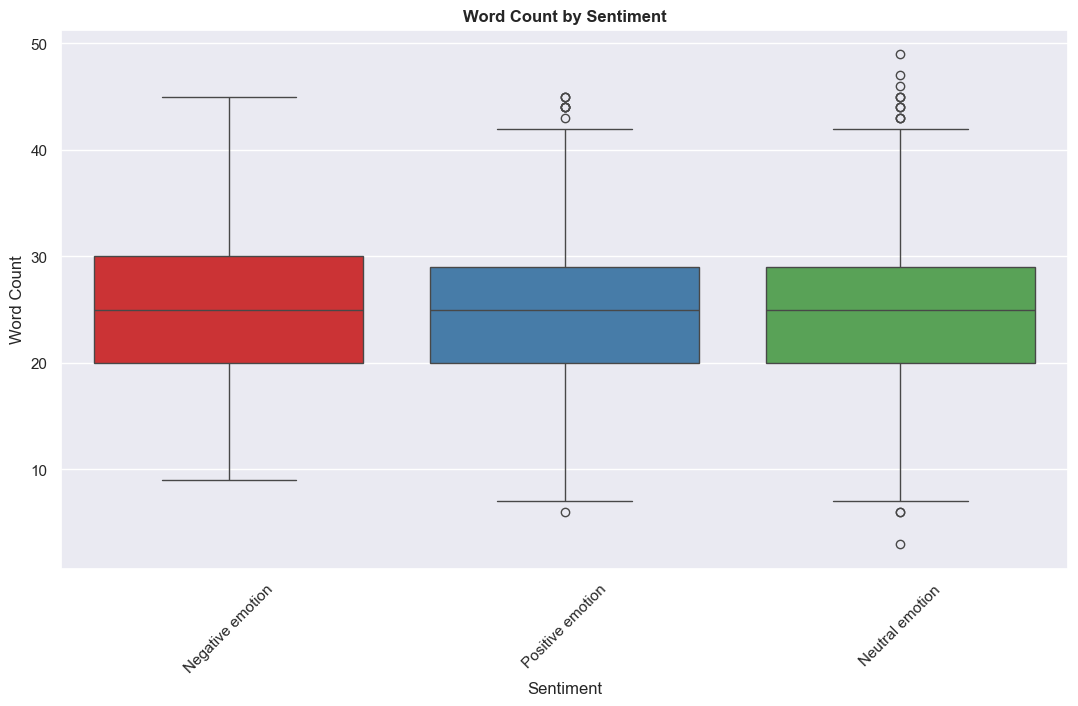

In [49]:
# Plot 8: Word Count by Sentiment

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='sentiment', y='words', palette='Set1')
plt.title('Word Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.xticks(rotation=45)

From the boxplot above, the following were observed:

- Negative and Neutral sentiments have a slightly higher median word count of about 25 words.

- Positive tweets are  shorter on average with about 22 words.

- Positive and Neutral categories contain more outliers. This shows a few unusually long tweets.

- The word count distributions are similar across sentiments with only minor differences in median and spread.

Text(0, 0.5, 'Frequency')

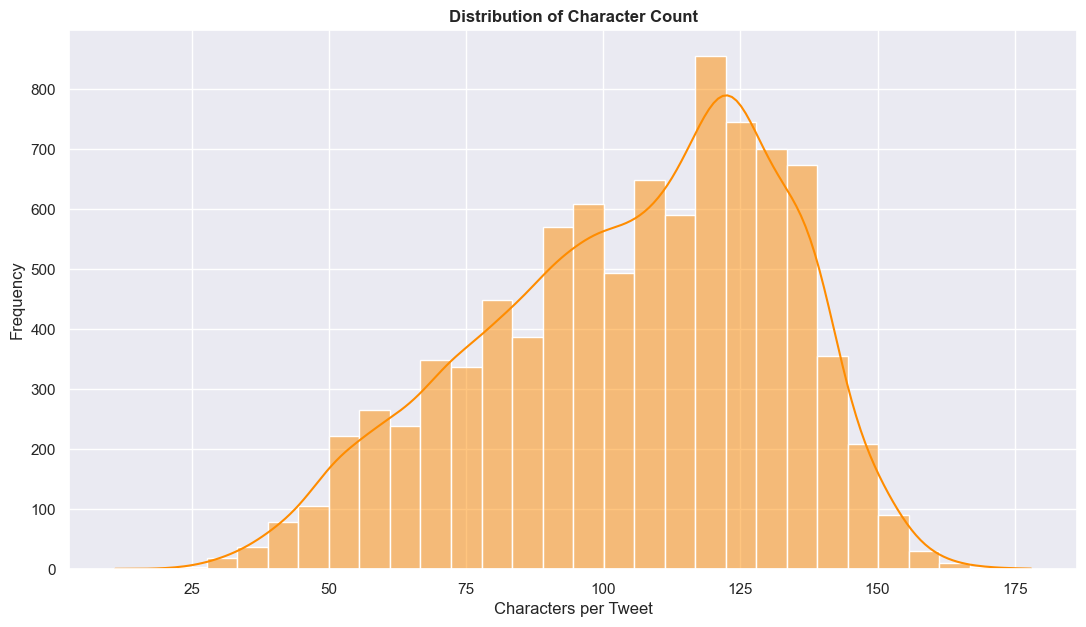

In [50]:
# Plot 9: Character Count Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data=data, x='chars', bins=30, kde=True, color='darkorange')
plt.title('Distribution of Character Count', fontweight='bold')
plt.xlabel('Characters per Tweet')
plt.ylabel('Frequency')

From the histogram above, the following were observed:

- Most tweets cluster between 75–150 characters with a peak around 125 characters.

- The density curve reinforces this central tendency showing that users often maximize available space in tweets.

- Very short or very long tweets are few. This shows a preference for mid length and concise messages that fit platform conventions and optimize clarity.

Text(0, 0.5, 'Character Count')

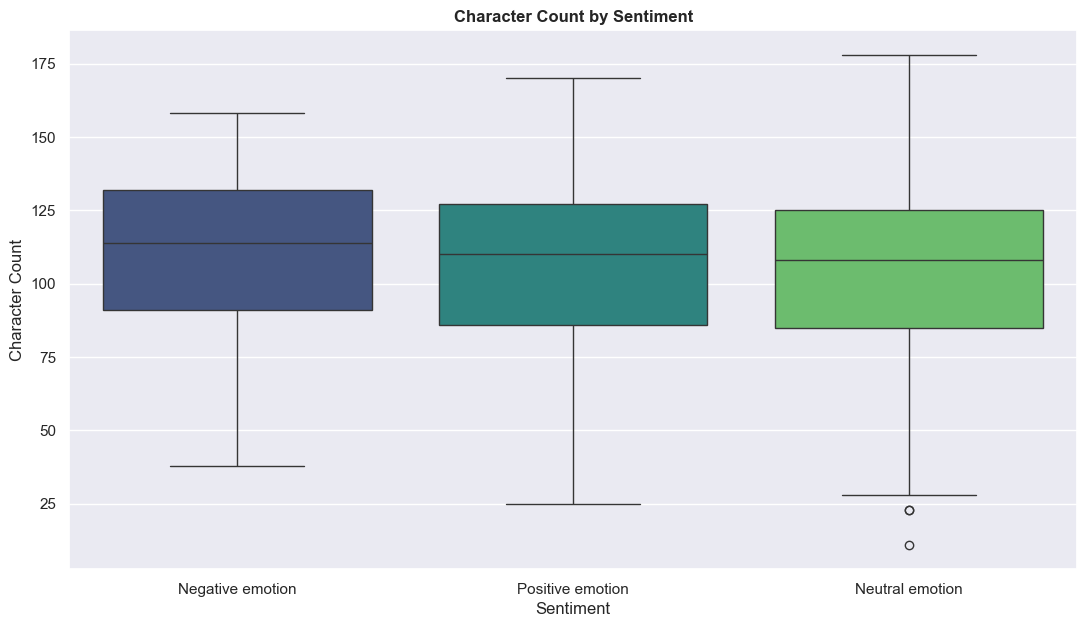

In [51]:
# Plot 10: Character Count by Sentiment

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='sentiment', y='chars', palette='viridis')
plt.title('Character Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Character Count')

The boxplot above shows that:

- Positive and Negative tweets have a similar distribution with a median of about 125 characters and an IQR between 100–150 characters.

- Neutral tweets are shorter with a median of around 100 characters and an IQR of 75–125.

- Two outliers below 25 characters appear in the Neutral category. This shows unusually short tweets.

- Tweets with emotional tone either Positive or Negative tend to be longer, while Neutral tweets are shorter and more variable.

Text(0, 0.5, 'Frequency')

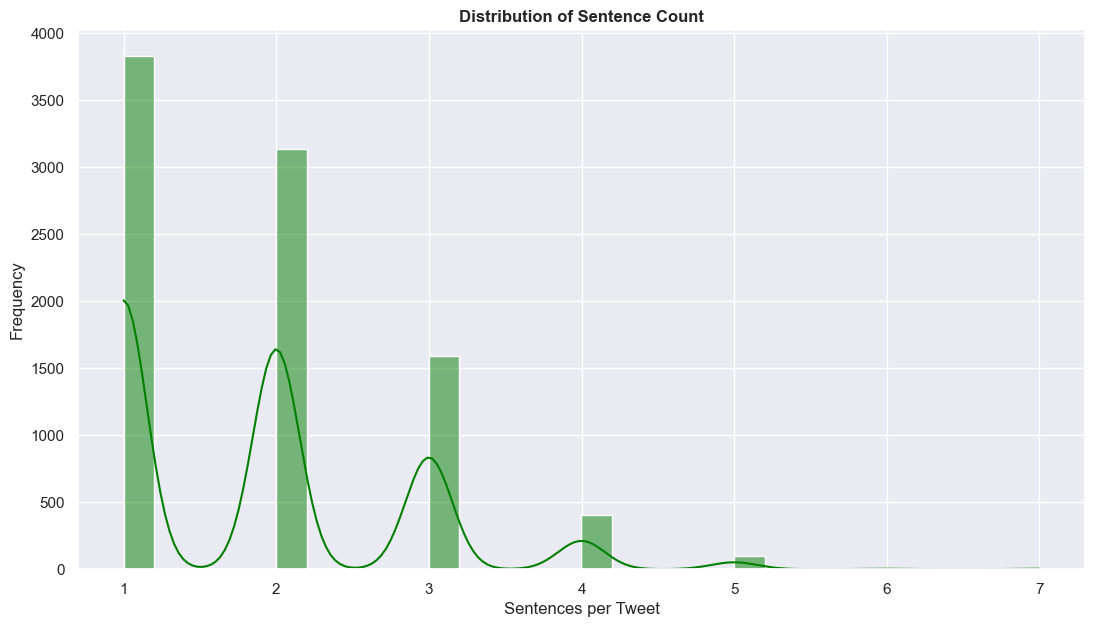

In [52]:
# Plot 11: Sentence Count Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data=data, x='sentences', bins=30, kde=True, color='green')
plt.title('Distribution of Sentence Count', fontweight='bold')
plt.xlabel('Sentences per Tweet')
plt.ylabel('Frequency')

From the sentence count distribution above, the following were observed:

- The histogram is right-skewed. This shows that most tweets are short and the frequency decreases as sentence count increases.

- Tweets with 1 or 2 sentences dominate the distribution with over 3,000 tweets. Those with 3 sentences account for around 1,500 tweets after which the count declines.

- The right skew shows that only a few users post tweets containing multiple sentences.

- The density curve confirms the concentration at low sentence counts, peaking near 1 and 2.

Text(0, 0.5, 'Sentence Count')

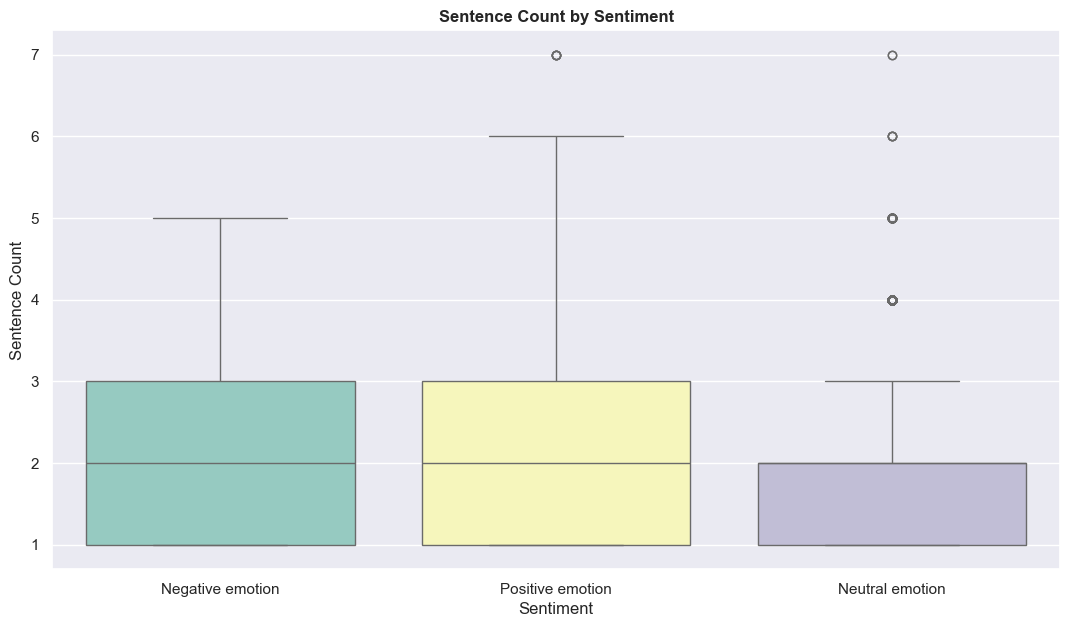

In [53]:
# Plot 12: Sentence Count by Sentiment

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='sentiment', y='sentences', palette='Set3')
plt.title('Sentence Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Sentence Count')

The boxplot above shows the distribution of sentence counts across Negative, Positive, and Neutral tweets.

- Negative and Positive tweets share a similar pattern with a median of 3 sentences, an IQR between 2–3 and a few outliers reaching 6–7 sentences.

- Neutral tweets are shorter with a median of 2 sentences, an IQR between 1–2 and several outliers up to 6 sentences.

- Tweets with emotional tone either Positive or Negative tend to be longer while Neutral tweets are shorter and more concise.

## 3. Data Cleaning and Preprocessing

This section focuses on preparing the dataset for analysis by applying systematic data cleaning, normalization and feature extraction procedures.

The aim is to transform raw, unstructured text into a clean and structured format suitable for effective sentiment classification.

These steps ensure data consistency, reduce noise and enhance the quality of features used for modeling.

### 3.1 Tweet Preprocessing Pipeline

In this step, a custom TweetPreprocessor class is introduced. It is designed to automate and standardize the text cleaning and feature extraction process for Twitter sentiment analysis.

A custom TweetPreprocessor performs the following:

- Cleaning: Removes URLs, @mentions and hashtags. It expands contractions,  normalizes repeated letters and strips special characters. In addition, it standardizes punctuation and whitespace.

- Linguistic Preprocessing: Converts to lowercase, tokenizes, removes stopwords and short tokens. In addition it lemmatizes to base forms.

- Feature Extraction: Transforms text to TF-IDF (default) or Count vectors with configurable n-grams, vocabulary size and document-frequency thresholds.

- Integration: Scikit-learn–compatible (fit, transform, fit_transform) for reproducible training and inference.

This ensures reliable text features that improve model clarity, comparability and downstream evaluation.


In [54]:
class TweetPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self,
                 remove_urls=True,
                 remove_mentions=True,
                 remove_hashtags=True,
                 remove_stopwords=True,
                 lemmatize=True,
                 lowercase=True,
                 min_length=2,
                 expand_contractions=True,  # New feature
                 remove_repeated_chars=True,  # New feature
                 tfidf_max_features=5000,
                 tfidf_ngram_range=(1, 2),
                 tfidf_min_df=1,  # Changed from 1 to prevent errors
                 tfidf_max_df=1.0,  # Changed from 0.95 to 1.0 for safer handling
                 use_tfidf=True):
        
# Initialize the TweetPreprocessor         
        self.remove_urls = remove_urls
        self.remove_mentions = remove_mentions
        self.remove_hashtags = remove_hashtags
        self.remove_stopwords = remove_stopwords
        self.lemmatize = lemmatize
        self.lowercase = lowercase
        self.min_length = min_length
        self.expand_contractions = expand_contractions
        self.remove_repeated_chars = remove_repeated_chars
        self.tfidf_max_features = tfidf_max_features
        self.tfidf_ngram_range = tfidf_ngram_range
        self.tfidf_min_df = tfidf_min_df
        self.tfidf_max_df = tfidf_max_df
        self.use_tfidf = use_tfidf

# Initialize the components
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.vectorizer = None

# Contraction mapping
        self.contractions = {
            "won't": "will not", "can't": "cannot", "n't": " not",
            "'re": " are", "'ve": " have", "'ll": " will",
            "'d": " would", "'m": " am", "it's": "it is",
            "that's": "that is", "what's": "what is",
            "there's": "there is", "here's": "here is"
        }

def _extract_text_from_input(self, X):
        if hasattr(X, 'values'):
# Handle pandas DataFrame or Series
            if hasattr(X, 'columns'):
# Check for tweet column or use the first column
                if 'tweet' in X.columns:
                    return X['tweet'].values
                else:
                    return X.iloc[:, 0].values
            else:
# Series
                return X.values
        elif isinstance(X, (list, tuple)):
# Handle list or tuple
            return X
        else:
# Handle numpy array or other array-like
            return X
        
def expand_contractions_text(self, text):
# Expand contractions in text
        if not self.expand_contractions:
            return text
        
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)
        return text

def remove_repeated_characters(self, text):
# Remove repeated characters
        if not self.remove_repeated_chars:
            return text   
# Replace more than 3 repeated characters with 2
        return re.sub(r'(.)\1{2,}', r'\1\1', text)

# Data Cleaning Function
def clean_text(self, text):
# Return empty string if text is NaN
        if pd.isna(text):
            return ''      
# Convert to string if not already
        text = str(text)
# Expand contractions first
        text = self.expand_contractions_text(text)     
# Remove repeated characters
        text = self.remove_repeated_characters(text)
# Remove URLs
        if self.remove_urls:
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
# Remove mentions
        if self.remove_mentions:
            text = re.sub(r'@\w+', '', text)
            # remove hashtags (but keep the text)
        if self.remove_hashtags:
            text = re.sub(r'#', '', text)
# Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s!?]', '', text)
# Convert multiple exclamation and question marks to single
        text = re.sub(r'!+', '!', text)
        text = re.sub(r'\?+', '?', text)
# Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

# Text Preprocessing Function
def preprocess_text(self, text):
# Return an empty string if not text
        if not text:
            return '' 
# Convert text to lowercase
        if self.lowercase:
            text = text.lower()
# Tokenize the text
        tokens = word_tokenize(text)
# Remove stop words and short words
        if self.remove_stopwords:
            tokens = [token for token in tokens
                      if token not in self.stop_words and len(token) >= self.min_length]
        else:
            tokens = [token for token in tokens if len(token) >= self.min_length]
# Lemmatize the tokens
        if self.lemmatize:
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]

        return ' '.join(tokens)

# Function to Fit the Vectorizer
def fit(self, X, y=None):
# Extract text data from input
        text_data = self._extract_text_from_input(X)
# Clean and preprocess the tweets
        processed_texts = []
        for text in text_data:
            cleaned = self.clean_text(text)
            preprocessed = self.preprocess_text(cleaned)
            processed_texts.append(preprocessed)
# Automatically adjust parameters for small datasets
        n_docs = len(processed_texts)
        min_df = min(self.tfidf_min_df, max(1, n_docs // 100))  # At least 1, at most n_docs/100
        max_df = min(self.tfidf_max_df, 1.0)  # Ensure max_df is never > 1.0
# Ensure min_df does not exceed reasonable bounds
        if min_df >= n_docs * max_df:
            min_df = 1
            max_df = 1.0

# Fit the TF-IDF Vectorizer
        if self.use_tfidf:
            self.vectorizer = TfidfVectorizer(
                max_features=self.tfidf_max_features,
                ngram_range=self.tfidf_ngram_range,
                min_df=min_df,
                max_df=max_df,
                stop_words='english'
            )
        else:
            self.vectorizer = CountVectorizer(
                max_features=self.tfidf_max_features,
                ngram_range=self.tfidf_ngram_range,
                min_df=min_df,
                max_df=max_df,
                stop_words='english'
            )
        self.vectorizer.fit(processed_texts)

        return self

# Function to transform the data
def transform(self, X):
# Check for fitted vectorizer
        if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first.")
# Extract text data from input
        text_data = self._extract_text_from_input(X)
# Process all the tweets
        processed_texts = []
        for text in text_data:
            cleaned = self.clean_text(text)
            preprocessed = self.preprocess_text(cleaned)
            processed_texts.append(preprocessed)
# Transform using the fitted vectorizer
        return self.vectorizer.transform(processed_texts)

# Fit_transform Function
def fit_transform(self, X, y=None):
     return self.fit(X, y).transform(X)

# Function to Get Feature Names
def get_feature_names_out(self, input_features=None):
     if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first")
        
     return self.vectorizer.get_feature_names_out()

# Function to Get the Vocabulary
def get_vocabulary(self):
     if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first")
        
     return self.vectorizer.vocabulary_

### 3.2 Data Cleaning Overview

This step applied rule based normalization to remove noise and standardize surface form:

- Removed URLs, @mentions and hashtags.

- Expanded common contractions. An example is can’t to cannot.

- Reduced repeated characters. For example goooood to good.

- Dropped non-alphabetic symbols. An example is collapse repeated ! and ?

- Normalized whitespace and trim.

This resulted in readable and de-noised text ready for linguistic processing.


### 3.3 Text Preprocessing Overview

This step standardized tokens to reduce sparsity and improve generalization:

- Converted to lowercase.

- Tokenized into words.

- Removed stopwords and very short tokens.

- Lemmatized to base forms. For example running to run.

This resulted in compact and cleaner token sequences.


### 3.4 Feature Extraction Overview

This step converted preprocessed text into numeric features:

- TF-IDF (default) or CountVectorizer.

- Configurable n-gram range max features and document-frequency bounds to balance coverage vs. sparsity.

- Returned a sparse matrix suitable for model training and evaluation.

This resulted in informative vectors aligned to modeling requirements.


### 3.5 Pipeline Integration Overview

- The class is compatible with scikit-learn pipelines. This enabled seamless integration with machine learning workflows.

- It provided methods for fitting, transforming and retrieving feature names and vocabulary.

This preprocessing pipeline systematically cleaned the raw tweets and transformed them into robust, model-ready features, improving the quality and effectiveness of downstream sentiment classification.